# Capstone Project 1 - Milestone Report

## Abstract
Hourly PM2.5 data of five major Chinese cities in the period of 2010-2015 are obtained, cleaned and analyzed in this project. The key findings are: 
* PM2.5 measurements are fairly consistency among nearby stations in all five cities.
* PM2.5 levels vary siginificantly among cities. The rankings of PM2.5 from the lowest to the highest are Guangzhou, Shanghai, Chengdu and Shenyang, Beijing. This corresponds to the air quality from the best to the worse, respectively.
* Time-dependent trends of PM2.5 reveal that PM2.5 level varies systematically with hour of the day, month/season of the year and from year to year, whereas no dependence and minor variation of PM2.5 on day of the week are observed; PM2.5 daily and monthly/seasonal trends are unique with individual cities, but yearly trend from 2010 to 2015 shows a consistent decrease in PM2.5 levels among five cities.
* Correlations with meteorological weather data reveal that all the weather features available in the datasets affect PM2.5 levels to some extent. Both high winds and large precipitations help to reduce high PM2.5 levels in all five cities; The dependence of PM2.5 on wind directions is unique for each city, as determined by location and neighbour environment; PM2.5 levels are also negatively correlated to temperature and dew point, and positively correlated to pressure and humidity. In particular, higher PM2.5 levels occur more frequently at weather conditions of lower temperatures, lower dew points, higher atmospheric pressures and higher humidity levels. 

## 1. Introduction

### 1.1 Problem

<p>In recent years, air pollution has become an increasingly severe problem in China due to rapid industrialization and high energy consumption. The thick haze and smog, characteristic of unhealthy air condition, raise intense public concerns and media attentions, as it has been linked to the increased occurrence of various respiratory diseases and resident mortality rates. According to reports, PM2.5 (ultrafine particles less than 2.5 microns in diameter) is the main pollutant accountable for at least two thirds of the severely polluted days in Chinese major cities, posting a significant threat to human health.</p>
<p>China has started the PM2.5 monitoring and reporting program in major cities since early 2013, and has extended to 388 cities by 2015. In addition, PM2.5 data prior to 2013 are available from US embassy in major Chinese cities. However, besides live monitoring and reporting, understanding PM2.5 trends and building a PM2.5 prediction system are strongly desired. With predictions, government and citizens can plan ahead and take actions accordingly.</p>

### 1.2 Approach

<p>In this project, we study the PM2.5 trends and its correlation to a variety of weather conditions, using the public datasets by UCI Repository containing hourly PM2.5 measurements for five major Chinese cities along with many other meteorological readings collected during the period of 2010-2015. Graphical and statistifcal EDA are performed to understand the time trends of PM2.5 variation, cross-city comparison of PM2.5 diversity and its correlation to a variety of weather conditions, such as emperature, humidity, pressure, wind direction and speed, precipitation, etc. A predictive machine learning model is created and optimized for predicting future PM2.5 levels.</p>

### 1.3 Impact

<p>A PM2.5 predictive model is beneficial to people at all levels in China, ranging from Chinese government, local organizations to individual citizens. Government can use this model to predict air quality, provide outdoor activity guideline for adults and children and issue appropriate warnings in advance. Local organizations can benefit from the model prediction to plan outdoor events, schedule emergency facility shutdowns when necessary. Individual citizens can also consult this predictive model to plan their commute choices, better schedule their daily outdoor activities to take full advantage of the clear sky hours and wear protective mask and clothings. The predictive model with reasonable accuracy will enable people to plan ahead accordingly, reducing the hassles and economical loss due to last minute changes as well as avoiding the exposure to extremely unhealthy air.</p>

### 1.4 Dataset
<p>PM2.5 data are acquired from UCI Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/PM2.5+Data+of+Five+Chinese+Cities and https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data. The first dataset contains hourly PM2.5 measurements for five Chinese cities (Beijing included), along with many other meteorological readings collected during the period of 2010-2015. These meteorological readings include dew point, temperature, humidity, pressure, combined wind direction, cumulated wind speed and hourly precipitation etc. The second dataset contains similar measurements for city Beijing alone during the period of 2010-2014. In this project, we focus on the first dataset, but also taking into consideration the ‘cumulative hours of snow’ and ‘cumulative hours of rain’ for city Beijing from the second dataset.</p>

## 2. Data Acquisition and Cleaning

<p>The raw data files are acquired from UCI Repository at: 1) https://archive.ics.uci.edu/ml/datasets/PM2.5+Data+of+Five+Chinese+Cities and 2) https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data, and downloaded as csv files. Files ‘beijing.csv’, ’shanghai.csv’, ‘guangzhou.csv’, ‘chengdu.csv’ and ‘shenyang.csv’ from the first link contain the hourly PM2.5 measurements for five major Chinese cities respectively, along with many other meteorological readings collected during the period of 2010-2015. These meteorological readings include dew point (‘DEWP’), temperature(‘TEMP’), humidity(‘HUMI’), pressure(‘PRES’), combined wind direction(‘cbwd’), cumulative wind speed (‘Iws’), hourly precipitation (‘precipitation’) and cumulative precipitation (‘Iprec’). File ‘beijing_2.csv’ from the second link contains similar hourly measurement data for city Beijing alone during the period of 2010-2014, with two unique columns, cumulative hours of snow (‘Is’) and cumulative hours of rain (‘Ir’).</p>
    
<p>The raw data is composed of 306744 rows and 30 columns, containing a combination of time-related records and various measurements taken at multiple stations in each city for a total of five cities in China from year 2010 to 2015. Both missing data and outliers are present. The following data wrangling strategies are used to clean up the raw data:
<li>Two additional columns are added: <br> **'date_time'** time-related information is recorded in separated columns as 'year', 'month', 'day', 'hour' and 'season' in the raw data. For EDA purposes, a DateTime formatted column is created. <br>**'pm_average'** Hourly PM2.5 readings from multiple stations are recorded for each city in the raw data. There's no reason to choose the PM2.5 reading from one station over others, therefore it's most representative to use the average PM2.5 readings in EDA and Modeling. A column 'pm_average' representing the average of pm2.5 readings from multiple stations of the same city is computed and added to the clean dataset. On the other hand, PM2.5 readings from individual stations are extracted separately to compare the measurement consistency among stations for each city.
<li>The raw dataset pm_raw will be separated into three separate subsets for cleaning, EDA and modeling:<br>
    **pm_clean** this is the main dataset containing the measurement data for all five cities, here the average pm2.5 reading for each city is used instead of pm2.5 data from individual stations<br>
    **pm_stations** this is a side dataset containing station-specific individual PM2.5 readings. This dataset serves the purpose of comparing the measurement consistency among stations for each city.<br>
    **pm_sr** this is also a side dataset containing information on cumulated hours of snows and rains for city 'beijing'. This dataset serves the purpose of comparing the impact of snow versus rain on PM2.5 readings.<br>
<li>Missing values and outliers will be evaluated and addressed within each subset. 

In [1]:
# import relevant modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

### 2.1 Import raw csv files

In [2]:
dfs=[] # empty list to temperarily store individual dataframes for future concatenation

citynames = ['beijing','shanghai','guangzhou','chengdu','shenyang','beijing_2']
for cityname in citynames:
    df = pd.read_csv('datasets/{}.csv'.format(cityname)) # import all six csv files as dataframes
    df['city'] = cityname  # add a new column to label the city each observation is associated with
    dfs.append(df) # append each df to the list dfs

pm_raw=pd.concat(dfs, sort=False) # concatenate all dfs into a single dataframe named pm_raw
pm_raw=pm_raw.reset_index(drop=True) # reset index

### 2.2 Clean up the main data (pm_clean)
pm_clean is the main set extracted from the raw data (pm_raw). It contains PM2.5 measurements as well as all the meteorological data for all five cities. The average pm2.5 levels of each city is used in this dataset instead of the pm2.5 readings from individual stations.

In [3]:
pm_clean = pm_raw[['year','month','day','hour','season','DEWP','HUMI','PRES','TEMP','cbwd','Iws','precipitation','Iprec','city']]
pm_clean = pm_clean[pm_clean['city'] != 'beijing_2'] # drop irrelevant rows
pm_clean.reset_index(drop=True,inplace=True) # update index
pm_clean.columns=pm_clean.columns.str.lower() # update column names to all lowercases

In [4]:
# add a new column 'pm_average' as the average pm2.5 readings from multiple stations in the same city

stations = ['PM_US Post','PM_Dongsi','PM_Dongsihuan','PM_Nongzhanguan','PM_Jingan','PM_Xuhui','PM_City Station','PM_5th Middle School','PM_Caotangsi','PM_Shahepu','PM_Taiyuanjie','PM_Xiaoheyan']
# calculate the mean pm2.5 readings across all pm2.5 stations (mean across relevant rows using axis=1)
pm_average = pm_raw[pm_raw['city'] != 'beijing_2'].loc[:,stations].mean(axis=1,skipna=True)
pm_average.name='pm_average'
pm_clean = pd.concat([pm_clean,pm_average], axis=1) #append pm_average to pm_clean horizontally

In [5]:
# for plotting purposes, add a new DateTime format column 'date_time' from time-related columns ('year','month','day','hour')

pm_clean['date_time']='' # initialize an empty column
# iterate through 'year','month','day','hour' columns, convert int/float to string type, append to 'date_time' column
for idx, col in enumerate(pm_clean.columns[0:4]):
    to_str = pm_clean[col].astype(str)
    # for 'month','day' and 'hour', update all string lengths to 2 by filling in 0 from the left  
    to_str = pd.Series([('0'+ entry) if len(entry) < 2 else entry for entry in to_str])   
    pm_clean['date_time'] += to_str
    
pm_clean['date_time'] = pd.to_datetime(pm_clean['date_time'], format='%Y%m%d%H') # convert to DateTime format

In [6]:
# drop rows with missing average PM2.5 data and missing 'season' label

print("numbers of rows before dropping:", len(pm_clean))
pm_clean.dropna(subset=['pm_average','season'],inplace=True)
print("numbers of rows after dropping:", len(pm_clean))
pm_clean.reset_index(drop=True,inplace=True) # update index

numbers of rows before dropping: 262920
numbers of rows after dropping: 175244


In [7]:
# update formats

pm_clean['season'] = pm_clean['season'].astype(int) # convert the data type from float to int for 'season' column
pm_clean['cbwd'] = pm_clean['cbwd'].str.upper() # update entries to all uppercases for 'cbwd' column

In [8]:
# identify and fix outliers
# summary statistics, histogram and boxplot are used to inspect all numerical columns
# entries near potential outliers are inspected to confirm and the outliers are replaced by nearby entries

print(pm_clean['precipitation'].idxmax()) # print out the outlier index in the 'precipitation' column
pm_clean.loc[49383,'precipitation']= pm_clean.loc[49382,'precipitation'] # replace outlier with value in its nearby entry

print(pm_clean['iprec'].idxmax()) # print out the outlier index in the 'iprec' column
pm_clean.loc[49383,'iprec']= pm_clean.loc[49382,'iprec'] # replace outlier with value in its nearby entry

print(pm_clean['dewp'].idxmin()) # print out the outlier index in the 'dewp' column
pm_clean.loc[100931:100934,'dewp']= (pm_clean.loc[100930,'dewp'] + pm_clean.loc[100935,'dewp'])/2 # replace outlier with the average value in its nearby entries

print(pm_clean['humi'].idxmin()) # print out the outlier index in the 'humi' column
pm_clean.loc[100931:100934,'humi']= pm_clean.loc[100930,'humi'] # replace outlier with value in its nearby entry

49383
49383
100931
100931


### 2.3 Clean up side data (pm_stations, pm_sr)
pm_stations is a side dataset extracted from the raw data (pm_raw), storing the station-specific individual PM2.5 readings, and serves the purpose of comparing the measurement consistency among stations for each city.
pm_sr is also a side dataset extracted from the raw data (pm_raw), containing information on cumulated hours of snows and rains in city 'beijing-2' for comparing the impact of snow versus rain on PM2.5 readings.

In [9]:
pm_stations = pm_raw[['year','month','day','hour','season','city','PM_US Post','PM_Dongsi','PM_Dongsihuan','PM_Nongzhanguan','PM_Jingan','PM_Xuhui','PM_City Station','PM_5th Middle School','PM_Caotangsi','PM_Shahepu','PM_Taiyuanjie','PM_Xiaoheyan']]

pm_stations = pm_stations[pm_stations['city'] != 'beijing_2'] # drop irrelevant rows
pm_stations.reset_index(drop=True,inplace=True) # update index
pm_stations.columns=pm_stations.columns.str.lower() # update column names to all lowercases

# drop rows where data in pm-related columns are all missing
stations=['pm_us post','pm_dongsi','pm_dongsihuan','pm_nongzhanguan','pm_jingan','pm_xuhui','pm_city station','pm_5th middle school','pm_caotangsi','pm_shahepu','pm_taiyuanjie','pm_xiaoheyan']
pm_stations.dropna(how='all',inplace=True, subset=stations)
pm_stations.reset_index(drop=True,inplace=True) # update index

pm_stations.loc[118857,'season'] = pm_stations.loc[118856,'season'] # replace the missing entry in 'season' column with its nearby entry
pm_stations['season'] = pm_stations['season'].astype(int) # convert the data type in 'season' column from float to int

In [10]:
# add a new DateTime format column 'date_time' from time-related columns ('year','month','day','hour') and set as index

pm_stations['date_time']='' # initialize an empty column
# iterate through 'year','month','day','hour' columns, convert int/float to string type, append to 'date_time' column
for idx, col in enumerate(pm_stations.columns[0:4]):
    to_str = pm_stations[col].astype(str)
    # for 'month','day' and 'hour', update all string lengths to 2 by filling in 0 from the left  
    to_str = pd.Series([('0'+entry) if len(entry) < 2 else entry for entry in to_str])   
    pm_stations['date_time'] += to_str
    
pm_stations['date_time'] = pd.to_datetime(pm_stations['date_time'], format='%Y%m%d%H') # convert to DateTime format
pm_stations.set_index('date_time',inplace=True) # set as DateTime index

In [11]:
pm_sr = pm_raw[['year','month','day','hour','city','DEWP','PRES','TEMP','cbwd','Iws','pm2.5','Is','Ir']]

pm_sr = pm_sr[pm_sr['city'] == 'beijing_2'] # drop irrelevant rows
pm_sr.columns=pm_sr.columns.str.lower() # update column names to all lower cases
pm_sr.dropna(subset=['pm2.5'],inplace=True) # drop rows with missing 'pm2.5' values
pm_sr.reset_index(drop=True,inplace=True) # update index

### 2.4 Cleaned datasets
insert figure using <img src="subdirectory/MyImage.png",width=60,height=60> to show the columns, unit, descriptions for each cleaned dataset

## 3. Exploratory Data Analysis and Inferential Statistics
### 3.1 PM2.5 consistency across stations
Prior to any other EDA, the inter-station comparison are performed to verify the PM2.5 measurement consistency among stations in the same city. This consistency check is of great importance, as it lays the fundation of using the average PM2.5 levels of all stations instead of station-specific PM2.5 data in all future analysis. Below is an example showing the inter-station comparison for city Beijing.

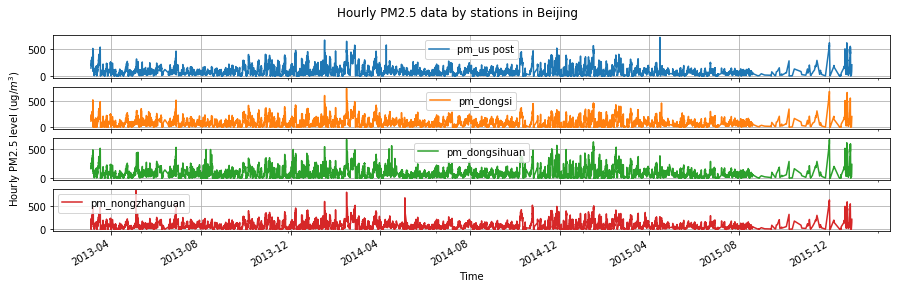

In [12]:
# extract stations PM2.5 data for Beijing
stations_bj = pm_stations[['pm_us post','pm_dongsi','pm_dongsihuan','pm_nongzhanguan']].dropna()

# plot hourly PM2.5 data by station
stations_bj.plot(subplots=True, grid=True, figsize=(15, 4), title='Hourly PM2.5 data by stations in Beijing');
plt.xlabel('Time');
plt.ylabel('Hourly PM2.5 level (ug/$m^3$)', y=2.2);

Graphic EDA verifies that the PM2.5 readings are fairly consistent among individual stations for all five cities, with peaks and valleys aligned and summary statistics comparable to each other. Given that PM2.5 readings are consistent among stations of the same city, the average PM2.5 levels, labeled as 'pm_average', are used in all future EDA and modeling.

### 3.2 PM2.5 diversity among cities
To understand how the air quality (PM2.5) varies with cities, PM2.5 levels are compared among cities: 1) time series PM2.5 data are plotted along with EPA standards for PM2.5 to compare the trends; 2) cumulative density function and boxplot are created to provide a more quantitative comparison.

In [13]:
# extract data for each city
bj = pm_clean[pm_clean['city']=='beijing'] # city 'beijing'
cd = pm_clean[pm_clean['city']=='chengdu'] # city 'chengdu'
gz = pm_clean[pm_clean['city']=='guangzhou'] # city 'guangzhou'
sh = pm_clean[pm_clean['city']=='shanghai'] # city 'shanghai'
sy = pm_clean[pm_clean['city']=='shenyang'] # city 'shenyang'

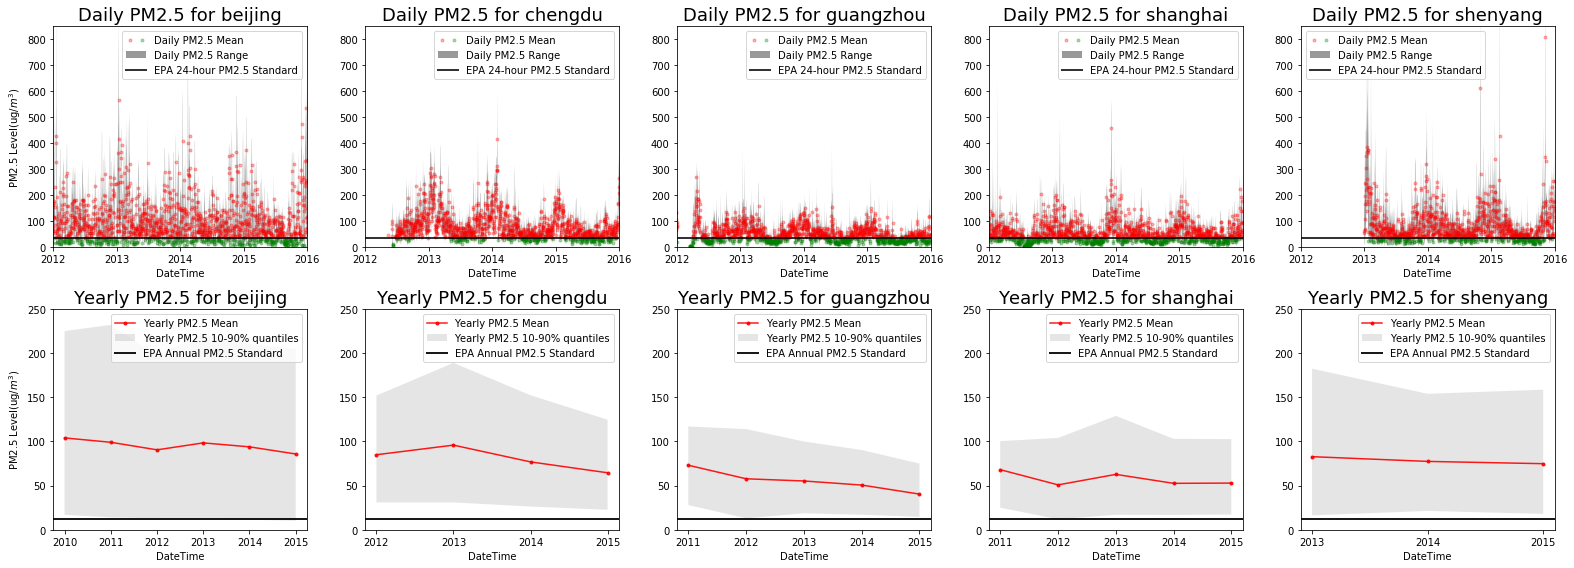

In [14]:
# compute resampled daily and yearly PM2.5 levels and plot by city

from matplotlib.legend_handler import HandlerTuple
i, j = 1, 6
fig = plt.figure(figsize=(22,8))

for city in (bj,cd,gz,sh,sy):
    ### daily PM2.5 levels using resampling by day###    
    daily_mean = city.reset_index(drop=True).set_index('date_time').resample('D')['pm_average'].mean() # extract daily mean
    daily_max = city.reset_index(drop=True).set_index('date_time').resample('D')['pm_average'].max() # extract daily max
    daily_min = city.reset_index(drop=True).set_index('date_time').resample('D')['pm_average'].min() # extract daily min
    daily = pd.concat([daily_mean, daily_max, daily_min], axis=1) # concatenate daily mean, max and min for plotting
    daily.columns = ['pm_daily_mean','pm_daily_max','pm_daily_min']
    
    # plot daily pm2.5 mean, max and min vs EPA PM2.5 standard
    daily_standard = 35
    daily_above = daily[daily['pm_daily_mean'] > daily_standard]
    daily_below = daily[daily['pm_daily_mean'] <= daily_standard]
    ax = fig.add_subplot(2,5,i)
    red, = ax.plot(daily_above.index, daily_above['pm_daily_mean'], color='red', marker='.',linestyle='none', alpha=0.3)
    green, = ax.plot(daily_below.index, daily_below['pm_daily_mean'], color='green', marker='.',linestyle='none', alpha=0.3)
    grey = ax.fill_between(daily.index, daily['pm_daily_max'], daily['pm_daily_min'], facecolor='grey',alpha=0.8)
    ax.set_xlim(['2012','2016']);
    ax.set_xticks(['2012','2013','2014','2015','2016']);
    ax.set_ylim([0,850]);
    black = ax.axhline(daily_standard, linewidth=2, color='black',alpha=0.8) # horizontal line to highlight EPA standard of 24-hour PM2.5
    ax.legend([(red,green),grey,black],['Daily PM2.5 Mean','Daily PM2.5 Range','EPA 24-hour PM2.5 Standard'],handler_map={tuple: HandlerTuple(ndivide=None)});
    ax.set_xlabel('DateTime');
    if i == 1:
        ax.set_ylabel('PM2.5 Level(ug/$m^3$)');
    ax.set_title('Daily PM2.5 for {}'.format(city['city'].unique()[0]), fontdict={'fontsize':18});
    i += 1
    
    ### yearly PM2.5 levels using resampling by year###  
    yearly_mean = city.reset_index(drop=True).set_index('date_time').resample('A')['pm_average'].mean() # yearly mean
    yearly_90 = city.reset_index(drop=True).set_index('date_time').resample('A')['pm_average'].quantile(0.9) # yearly 90% quantile
    yearly_10 = city.reset_index(drop=True).set_index('date_time').resample('A')['pm_average'].quantile(0.1) # yearly 10% quantile
    yearly = pd.concat([yearly_mean, yearly_90, yearly_10], axis=1) # concatenate yearly mean, 10% 90% quantiles for plotting
    yearly.columns = ['pm_yearly_mean','pm_yearly_90%','pm_yearly_10%']
    
    # plot yearly pm2.5 mean, 10% and 90% quantiles vs EPA PM2.5 standard
    yearly_standard = 12
    ax = fig.add_subplot(2,5,j)
    red, = ax.plot(yearly.index, yearly['pm_yearly_mean'], marker='.', color='red',alpha=0.9)
    grey = ax.fill_between(yearly.index, yearly['pm_yearly_90%'], yearly['pm_yearly_10%'], facecolor='grey',alpha=0.2)
    ax.set_xticks(yearly.index);
    ax.set_ylim([0,250]);
    black = ax.axhline(yearly_standard, linewidth=2, color='black',alpha=0.9) # horizontal line to highlight EPA standard of annual PM2.5
    ax.legend([red, grey, black],['Yearly PM2.5 Mean','Yearly PM2.5 10-90% quantiles','EPA Annual PM2.5 Standard']);
    ax.set_xlabel('DateTime');
    if j == 6:
        ax.set_ylabel('PM2.5 Level(ug/$m^3$)');
    ax.set_title('Yearly PM2.5 for {}'.format(city['city'].unique()[0]),fontdict={'fontsize':18});
    j += 1

plt.tight_layout();

<p>According to the United States Environmental Protection Agency (EPA), the national particle pollution standards for particulate matter(PM) have been set to protect public health, including the health of "sensitive" populations such as asthmatics, children, and the elderly, as well as to protect public welfare, including protection against decreased visibility, damage to animals, crops, vegetation, and buildings. EPA has established PM2.5 standards that specifically addressed particles smaller than 2.5 microns (PM2.5) since 1997. According to the latest revisions by EPA, the national 24-hour PM2.5 standard is 35 μg/m3 (September, 2006) and the annual PM2.5 standard is 12μg/m3 (December, 2012).</p>

As shown above: 
* Guangzhou has the lowest PM2.5 levels (best air quality), followed by Shanghai, Chengdu and Shenyang, whereas Beijing has the highest average PM2.5 levels and the most widely spreaded daily PM2.5 levels. 
* Five cities all have distinct PM2.5 spikes, as peak PM2.5 readings can result from many factors, for instance, local temperature, wind, etc. These factors are city specific, therefore PM2.5 spikes are not overlapping. 
* Five cities share similar trends over time: PM2.5 readings are relative higher with larger fluctuations during winter periods and lower with smaller fluctuations in summers.
* When compared with the daily and annual EPA standards, most of the daily average PM2.5 levels fail to meet the EPA standard for 24-hour PM2.5 level, and none of the annual PM2.5 levels meet the EPA standard for annual PM2.5 level. This indicates that although PM2.5 levels are gradually improving over time in Chinese major cities, but they are still too high to be considered healthy and safe by EPA standards, and the air quality problems in China still desire a lot of attention and effort.

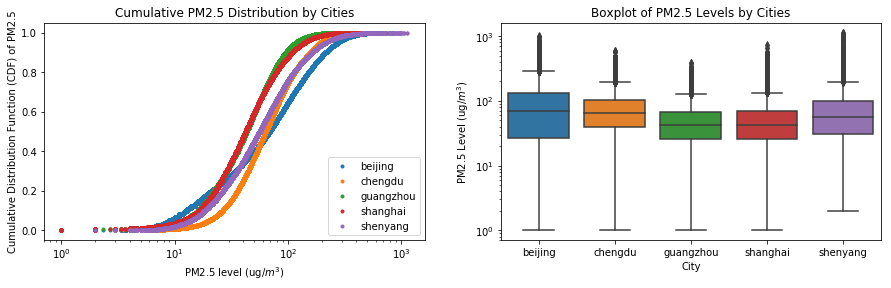

In [15]:
# plot cumulative distribution function (CDF) and boxplot of hourly PM2.5 readings by city

fig = plt.figure(figsize=(15,4))
pmbycity = pm_clean.pivot(index='date_time',columns='city',values='pm_average') # pivot by 'city' to extract city-specific PM2.5 data

# CDF plot by city
def cdf(array):
    """Compute CDF for 1D array of measurement data."""
    x = np.sort(array) # sort array to use as the x axis   
    y = np.arange(1, len(array)+1)/len(array) # use np.arange to create the y axis for cdf from 1/len to 1
    return x,y # return x and y as the data for x axis and y axis, repectively

ax1 = fig.add_subplot(1,2,1)
for city in pmbycity.columns: # Compute ECDFs for five cities, and plot all ECDFs on the same plot
    series = pmbycity[city].dropna()
    x, y = cdf(series)
    ax1.plot(x, y, marker = '.', linestyle='none');
plt.xscale('log');  # use logrithmic scale to see the features at low PM2.5 levels
plt.legend(pmbycity.columns, loc='lower right');
plt.xlabel('PM2.5 level (ug/$m^3$)');
plt.ylabel('Cumulative Distribution Function (CDF) of PM2.5');
plt.title('Cumulative PM2.5 Distribution by Cities');

# boxplot by city
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(data=pmbycity, ax=ax2);
plt.yscale('log'); # set y axis to logrithmic scale for better visualization of the interquantile range
plt.xlabel('City');
plt.ylabel('PM2.5 Level (ug/$m^3$)');
plt.title('Boxplot of PM2.5 Levels by Cities');

As shown, the CDF curves reveal significant differences among five cities:
* Beijing: Beijing has the widest PM2.5 spread among the five cities. Although it has more days of low PM2.5 readings (clear sky and healthy air), it also has more days of extremely high PM2.5 readings (smog and unhealthy air) than the other four cities. On average, it has the highest median PM2.5 level among five cities; 
* Chengdu: Chengdu has high PM2.5 readings in general, with its median ranked second to the highest;
* Guangzhou: Guangzhou has lower PM2.5 readings than all others, and its median is also among the lowest. It also has the fewest days of high PM2.5 readings;
* Shanghai: Shanghai also has low PM2.5 readings overall, with its median lies among the lowest. But it has more days of high PM2.5 readings than Guangzhou; 
* Shenyang: Shenyang has lower PM2.5 readings than Chengdu for the most part, but it has more days of extremely high PM2.5 readings than Chengdu. 

The boxplot agrees with CDF plots, indicating that the air quality ranking from the best to the worst are: Guangzhou, Shanghai, Chengdu/Shenyang, Beijing. Among the five, Guangzhou has the most consistent low PM2.5 readings, whereas Beijing has the largest spread of PM2.5 readings.

### 3.3 PM2.5 trends over time
Hourly PM2.5 levels are plotted vs hour of the day, day of the week, month of the year, season of the year, as a function of different years to understand the hourly, daily, monthly, seasonal and yearly air quality variations in each city. Trends of PM2.5 vs hour of the day, month of the year and from year to year are shown below by city.
(Day of the week and seasonal trends are hidden here, as day of the week trends show only minor fluctuations with no clear trend and no difference between weekdays and weekends. Seasonal trends are fairly consistent with monthly trends, therefore are not shown.)

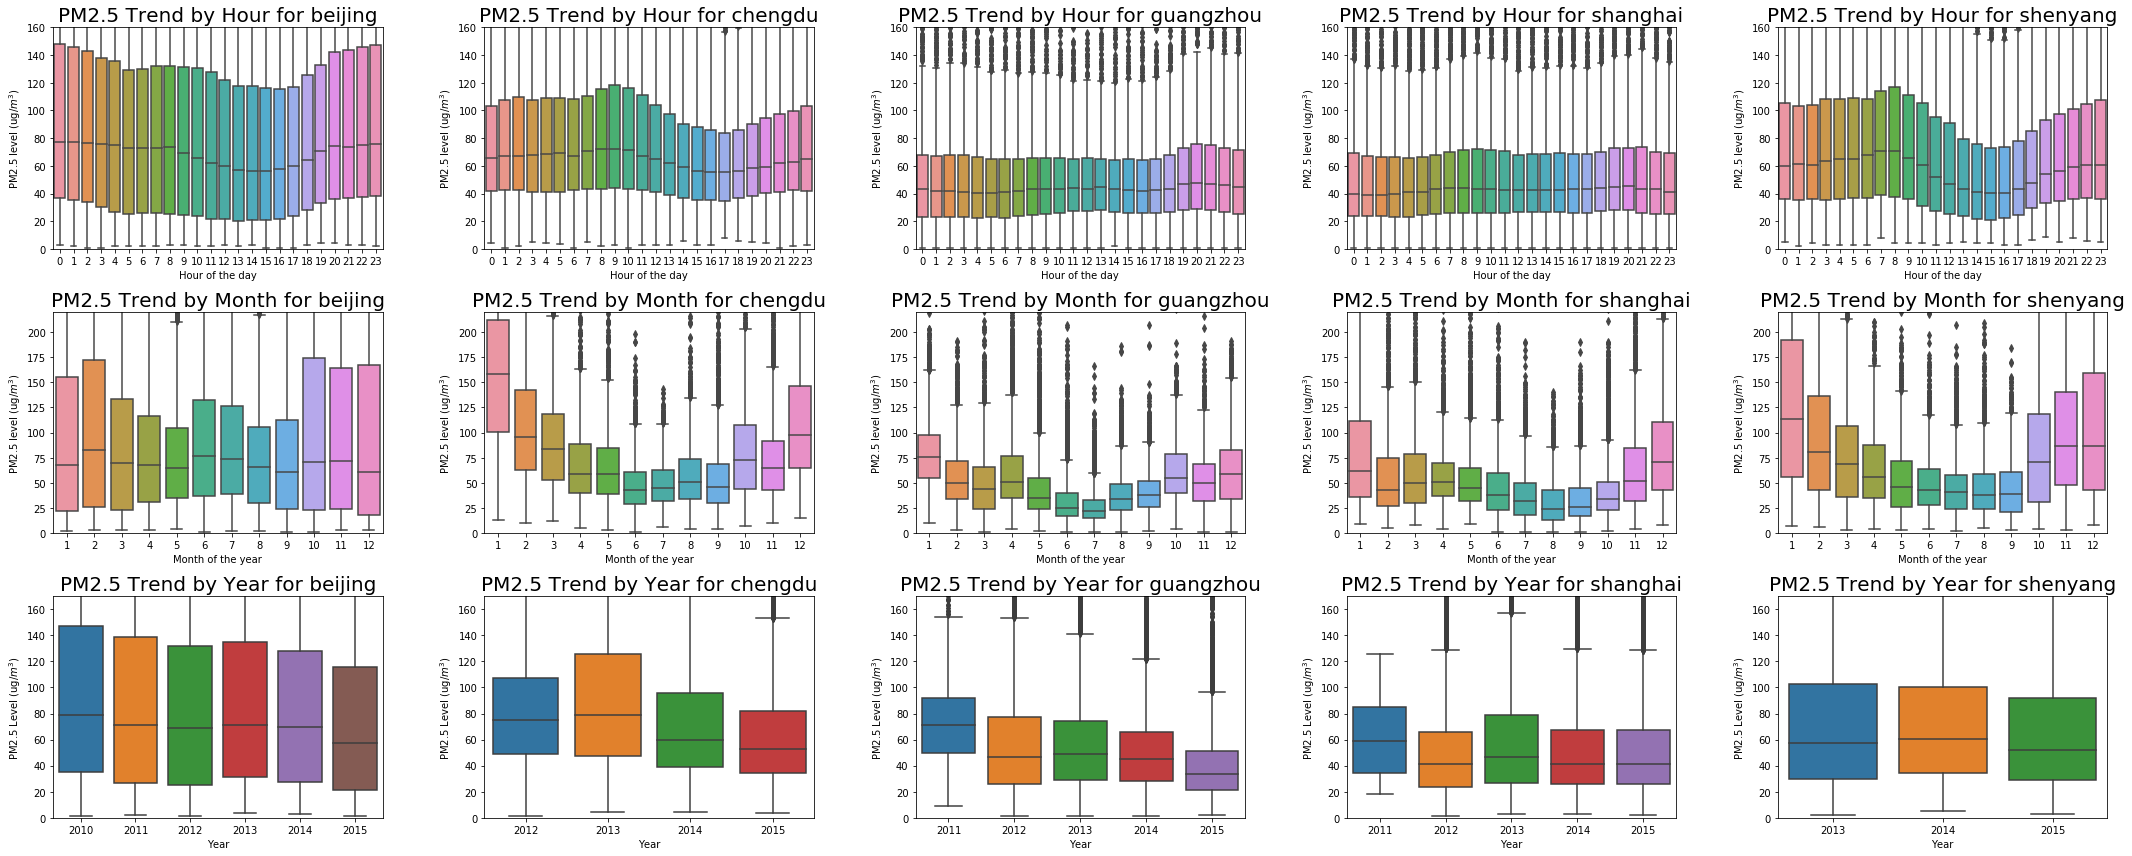

In [16]:
fig = plt.figure(figsize=(30,12))
i,j,k = 1,6,11

for city in (bj,cd,gz,sh,sy): # plot the trends for all five cities
    #plot 'pm_average' by hour of the day
    ax1 = fig.add_subplot(3,5,i)
    sns.boxplot(x='hour',y='pm_average',data=city,ax=ax1)
    plt.ylim([0,160]);
    plt.xlabel('Hour of the day');
    plt.ylabel('PM2.5 level (ug/$m^3$)');
    plt.title('PM2.5 Trend by Hour for {}'.format(city['city'].unique()[0]), fontsize=20);
    i += 1
    
    #plot 'pm_average' by month of the year
    ax2 = fig.add_subplot(3,5,j)
    sns.boxplot(x='month', y='pm_average',data=city,ax=ax2)
    plt.ylim([0,220]);
    plt.xlabel('Month of the year');
    plt.ylabel('PM2.5 level (ug/$m^3$)');
    plt.title('PM2.5 Trend by Month for {}'.format(city['city'].unique()[0]),fontsize=20);
    j += 1
    
    #plot 'pm_average' by year
    ax3 = fig.add_subplot(3,5,k)
    sns.boxplot(x='year',y='pm_average',data=city,ax=ax3)
    plt.ylim([0,170]);
    plt.xlabel('Year');
    plt.ylabel('PM2.5 Level (ug/$m^3$)');
    plt.title('PM2.5 Trend by Year for {}'.format(city['city'].unique()[0]),fontsize=20);
    k +=1

plt.tight_layout();

**The hourly trends follow two distinct patterns:** 
* Beijing, Chengdu, Shenyang: larger fluctuations during the 24-hour period;
PM2.5 readings rise slightly during morning rush hours (around 7-9), then drop down afterwards; The readings reach the lowest in the afternoon (around 14-16), then bound back during evening hours, and remain high throughout the night. 
* Shanghai, Guangzhou: only minor fluctuations during the 24-hour period;
PM2.5 readings is slightly higher during the day, with minor increase during evening hours (19-22); during the night, readings are slightly lower.<br>
The differences between the two distinct trends might be attributed to their physical locations. Shanghai and Guangzhou are coastal cities, whereas Beijing, Chengdu and Shenyang are inland cities.

**The monthly trends also demonstrate two distinct patterns:**
* Chengdu, Guangzhou, Shanghai and Shenyang: these four cities share similar trends of large variations around the year; PM2.5 starts to drop during spring months, reaches the lowest during summer months, begins to bound up during fall months and rapidly reaches the highest during winter months. In general, the average PM2.5 levels in winter months are at least twice as high as that of summer months, with large quantile ranges in hourly PM2.5 levels. 
* Beijing: minor fluctuations around the year; the hourly PM2.5 levels in Beijing doesn't fluctuate from month to month like other cities do. On the contrary, the numbers are slightly higher in the summer months with narrower quantile ranges, and slightly lower during winter and spring months with wider quantile ranges.  

**The year-to-year trends show a continuous improvement over time**:
* PM2.5 levels follow downward trends for all five cities, indicative of improving air quality over time, except for the minor setback observed in 2013 in four out of the five cities.

**Chi-square test of independence:**<br>
To verify the dependence of hourly PM2.5 levels on particular time periods is statistically significant, the numerical hourly PM2.5 values are categorized into categories, and the Chi-square test of independence is conducted between hourly PM2.5 levels and various time frequencies (hour of the day, day of the week, month of the year, season of the year and from year to year) for all five cities. <br> 
In general, the computed p-values are very small in almost all cases, confirming the correlation between PM2.5 levels and datetime.

### 3.4 PM2.5 correlation to weather conditions
The aforementioned time trends suggest that besides time, there are other underlying factors playing important roles in shaping the air quality (PM2.5 levels). Weather conditions, including temperature, dew point, pressure, humidity, wind direction and speed, and precipitations, are evaluated and correlated to hourly PM2.5 levels.

#### Overview of correlations

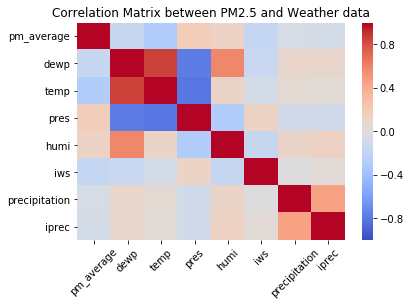

In [17]:
corr = pm_clean[['pm_average','dewp','temp','pres','humi','iws','precipitation','iprec']].corr() # compute correlation matrix
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap='coolwarm');
plt.xticks(rotation=45);
plt.title('Correlation Matrix between PM2.5 and Weather data');

As shown, PM2.5 levels are negatively correlated to temperature, dew point, wind speed and precipitation, and positivley correlated to pressure and humidity. In the following EDA, each correlation is analyzed in more details.

#### Correlation between PM2.5 and temperature, dew point, pressure & humidity

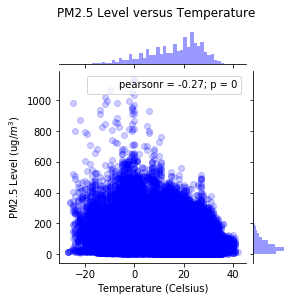

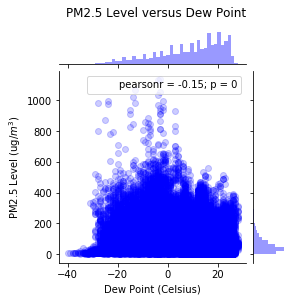

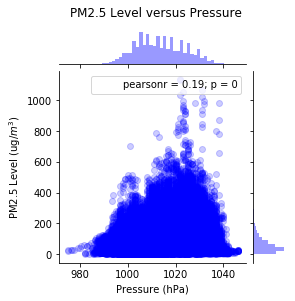

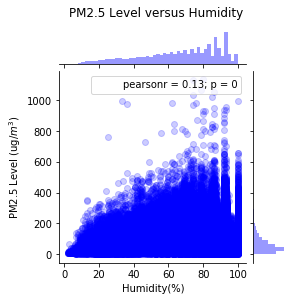

In [18]:
g1 = sns.jointplot(x='temp', y='pm_average', data=pm_clean, size=4, color='blue',alpha=0.2) # PM2.5 vs Temperature
g1.set_axis_labels(xlabel='Temperature (Celsius)',ylabel='PM2.5 Level (ug/$m^3$)');
plt.title('PM2.5 Level versus Temperature',x=-3,y=1.25);

g2 = sns.jointplot(x='dewp', y='pm_average', data=pm_clean, size=4, color='blue',alpha=0.2) # PM2.5 vs Dew Point
g2 = g2.set_axis_labels(xlabel='Dew Point (Celsius)',ylabel='PM2.5 Level (ug/$m^3$)')
plt.title('PM2.5 Level versus Dew Point',x=-3,y=1.25);

g3 = sns.jointplot(x='pres', y='pm_average', data=pm_clean, size=4, color='blue',alpha=0.2) # PM2.5 vs Pressure
g3 = g3.set_axis_labels(xlabel='Pressure (hPa)',ylabel='PM2.5 Level (ug/$m^3$)')
plt.title('PM2.5 Level versus Pressure',x=-3,y=1.25);

g4 = sns.jointplot(x='humi', y='pm_average', data=pm_clean, size=4, color='blue',alpha=0.2) # PM2.5 vs Humidity
g4 = g4.set_axis_labels(xlabel='Humidity(%)',ylabel='PM2.5 Level (ug/$m^3$)')
plt.title('PM2.5 Level versus Humidity',x=-3,y=1.25);

*Temperature:* As suggested by the jointplot and Pearson's r, there are a negative correlation between PM2.5 and temperature. Particularly, higher PM2.5 levels are mostly associated with lower temperatures below 10 celsius (cold weather).

*Dew point:* Similar to temperature, there is a negative correlation between PM2.5 and dew point. Higher PM2.5 levels are mostly associated with lower dew points below 5 degree celsius. This is expected as the correlation matrix reveals a positive correlation between temperature and dew point. 

*Pressure:* There is a positive correlation between PM2.5 and pressure. In partucular, higher PM2.5 levels are mostly associated with higher atmospheric pressures. This is also expected as pressure and temperature are negatively correlated in the correlation matrix. 

*Humidity:* There is a weak positive correlation between PM2.5 readings and humidity, but it's still statistically significant. Higher PM2.5 levels are more likely to occur at higher humidity levels.

#### Correlation between PM2.5 and wind

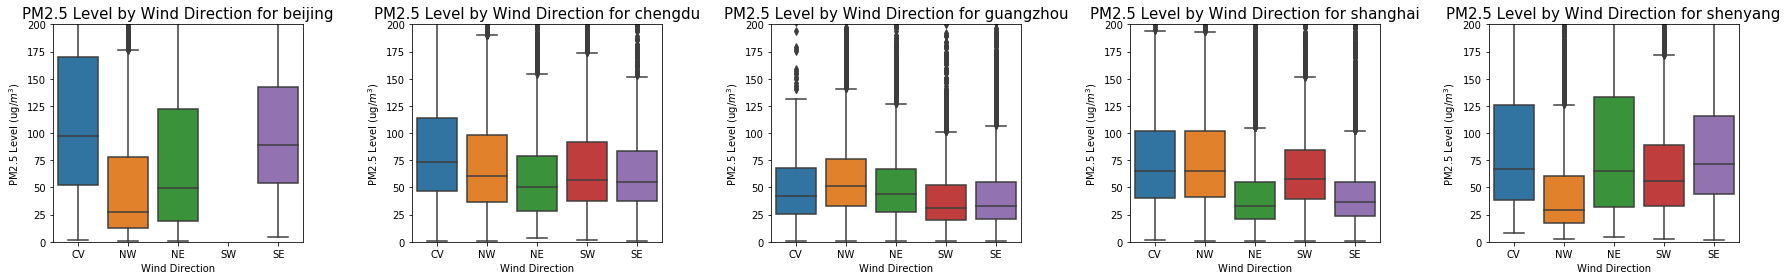

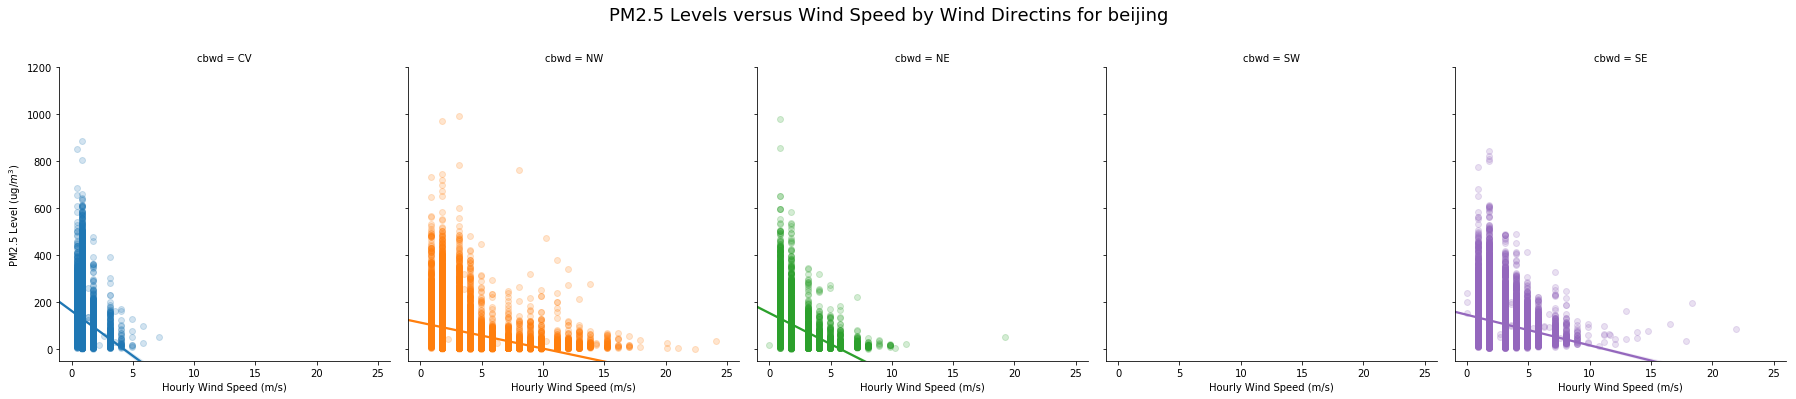

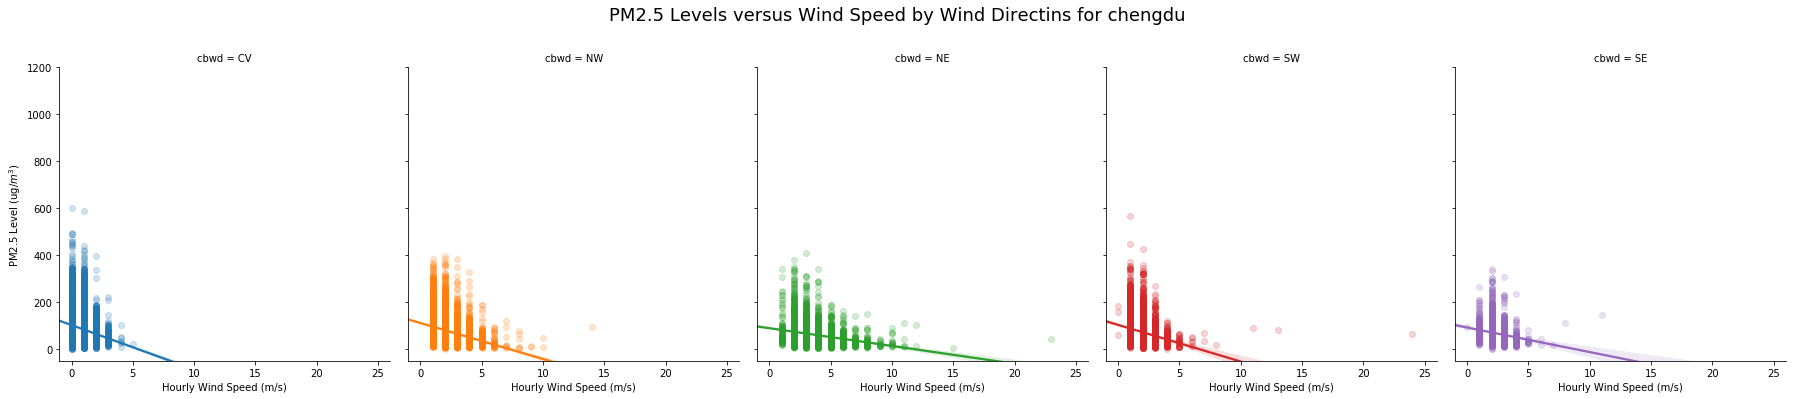

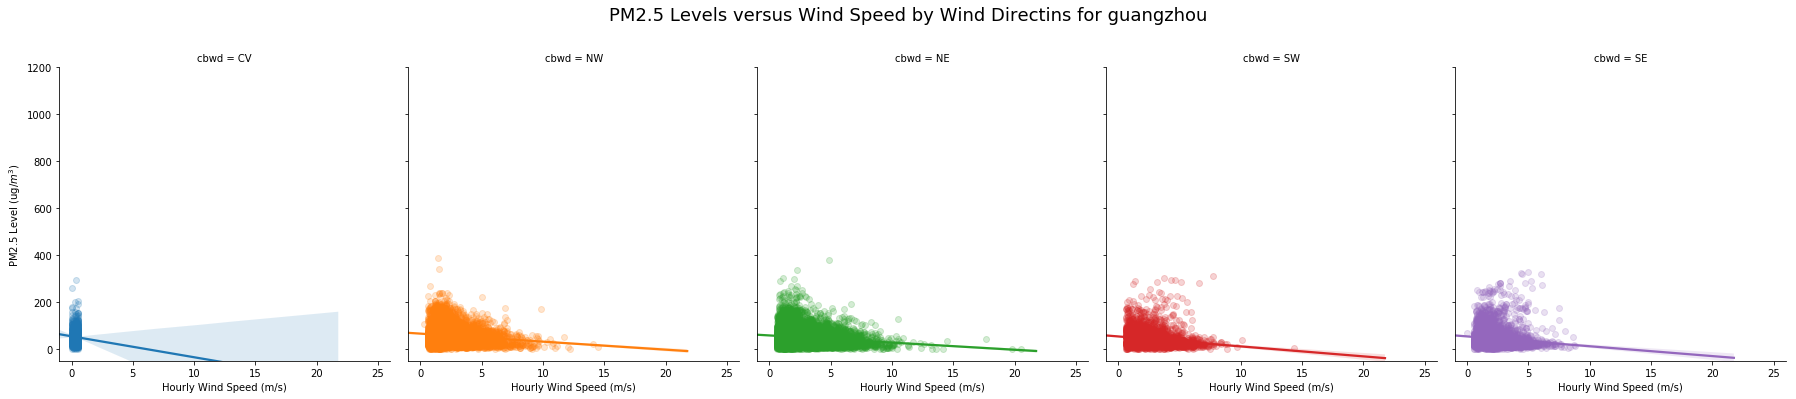

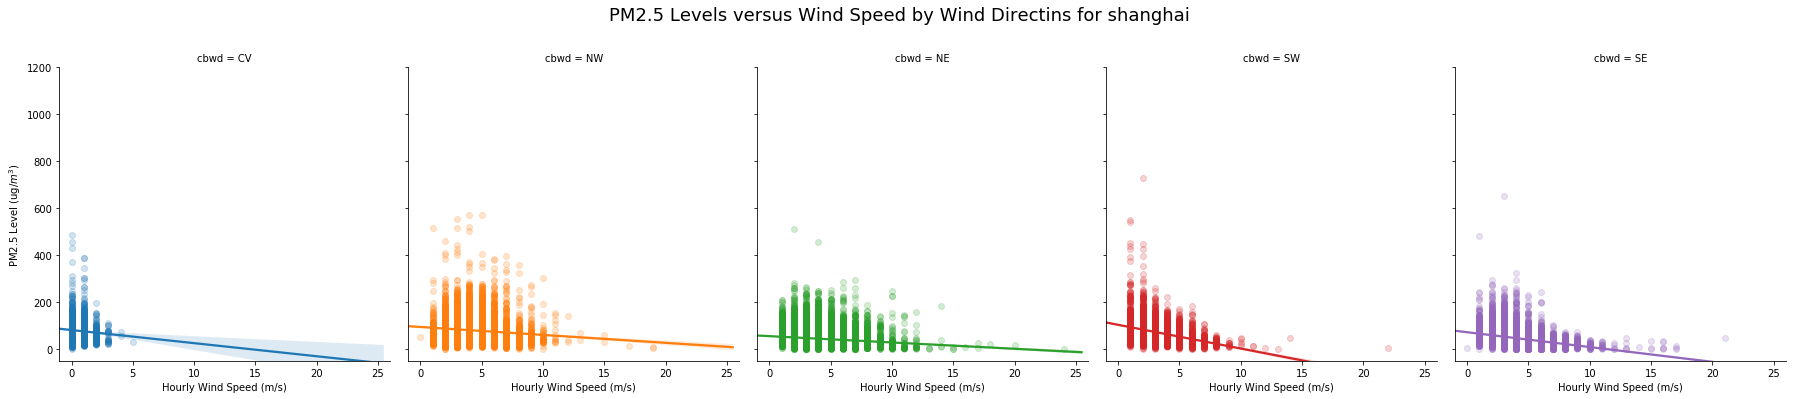

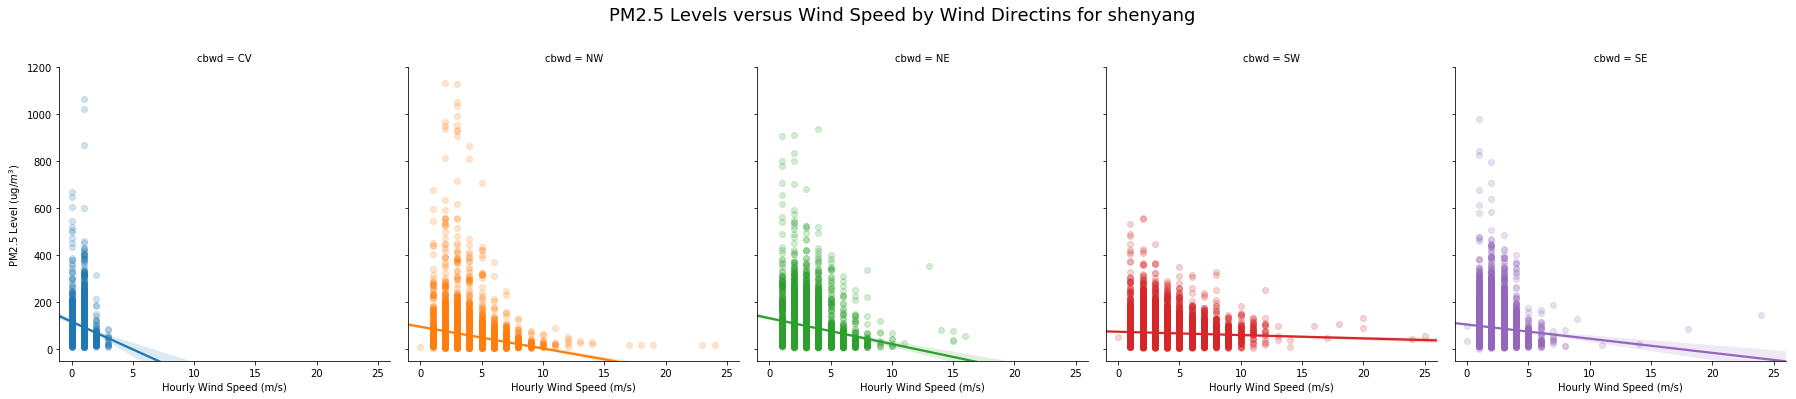

In [19]:
# plot PM2.5 by wind direction 
fig = plt.figure(figsize=(25,4))
i = 1
for city in (bj,cd,gz,sh,sy):
    ax = fig.add_subplot(1,5,i)
    sns.boxplot(x='cbwd',y='pm_average',data=city, order=['CV','NW','NE','SW','SE'],ax=ax);
    plt.ylim([0,200]);
    plt.xlabel('Wind Direction');
    plt.ylabel('PM2.5 Level (ug/$m^3$)');
    plt.title('PM2.5 Level by Wind Direction for {}'.format(city['city'].unique()[0]),fontsize=15);
    i += 1
plt.tight_layout();

# plot PM2.5 versus wind speed categorized by wind directions
for city in (bj,cd,gz,sh,sy):
    pm_ws = city[['iws', 'cbwd','pm_average']].dropna().reset_index(drop=True) # extract relevant columns   
    pm_ws['ws'] = np.nan # new column 'ws' for hourly wind speed

    # calculate hourly wind speed ('ws') from cumulated wind speed ('iws') by taking into consideration the periodic resets to zero
    for idx in range(len(pm_ws)):
        if idx == 0: 
            pm_ws.loc[idx, 'ws'] = pm_ws.loc[idx, 'iws'] #'ws' = 'iws' for the very first entry
            continue    
        # if the wind direction remains the same and the cumulated wind speed is increasing in number, substract previous 'iws' from current 'iws' to compute the hourly wind speed
        if pm_ws.loc[idx,'cbwd'] == pm_ws.loc[idx-1,'cbwd'] and pm_ws.loc[idx,'iws'] >= pm_ws.loc[idx-1,'iws']: 
            pm_ws.loc[idx,'ws'] = pm_ws.loc[idx,'iws'] - pm_ws.loc[idx-1,'iws']
        # otherwise, cumulated wind speed in this row is not cumulative, assign it directly as hourly wind speed
        else:
            pm_ws.loc[idx,'ws'] = pm_ws.loc[idx,'iws']
    pm_ws = pm_ws[pm_ws['ws'] <= 25] # drop outliers with 'ws' above 25 m/s (very strong storm with sigficant damage)
    
    #plot PM2.5 vs. hourly wind speed categorized by wind directions
    g = sns.lmplot(x='ws', y='pm_average', data=pm_ws, fit_reg=True, col='cbwd', hue='cbwd', col_order=['CV','NW','NE','SW','SE'], hue_order=['CV','NW','NE','SW','SE'],scatter_kws={'alpha':0.2})
    g.set(xlim=(-1,26), ylim=(-50,1200));
    g.set_axis_labels('Hourly Wind Speed (m/s)', 'PM2.5 Level (ug/$m^3$)');
    plt.annotate('PM2.5 Levels versus Wind Speed by Wind Directins for {}'.format(city['city'].unique()[0]), xy=(0,0),xytext=(-70,1400), size=18);

*Wind direction:*<br> 
As shown, wind directions are classified into the following five categories: Northwest(NW), Northeast(NE), Southeast(SE), Southwest (SW) and static wind (CV). Boxplots reveal a strong dependency of PM2.5 on wind direction. More importantly, the dependence differs by city, as determined by the unique location and neighbour environment of each city.

*Wind speed:* <br>

variations by city: <br>
* Beijing: Winds from northwest are the strongest among all. Winds from northeast (NE) are most effective at reducing high PM2.5 readings, followed by the winds from southeast (SE), whereas some high PM2.5 levels (>200) are still observed at northwest(NW) winds of speeds above 10 m/s.
* Chengdu: The PM2.5 levels are generally lower than Beijing. The northeast winds are the strongest, followed by northwest winds, then winds from the south. All wind directions show that as wind speed increases, the PM2.5 level drops. But the effect is the most significant with southwest winds.
* Guangzhou: The PM2.5 levels are generally the lowest among all cities. Winds from the north (NE, NW) are stronger than winds from the south (SE, SW). Higher wind speeds help to reduce PM2.5 levels, but the effect is very limited here, probably due to the relatively low PM2.5 levels.
* Shanghai: Winds from the east (NE, SE) are stronger than winds from the west (SW, NW). All wind directions show that higher wind speeds help to reduce PM2.5 levels, but the effect is the most prominent with southwest winds.
* Shenyang: The PM2.5 levels are generally higher. Winds from the west (NW, SW) are stronger than winds from the east (NE, SE). All wind directions show that higher wind speeds help to reduce PM2.5 levels, but the effect is the most prominent with winds from the east (NE, SE).

common characteristics shared by all cities:<br>
* Higher wind speeds help to reduce PM2.5 levels, this has been observed with all wind directions in all cities; 
* Static winds feature low wind speeds (<5 m/s), therefore they have limited effect on reducing PM2.5 levels; 
* The wind direction with higher wind speeds has smaller PM2.5 median value and interquantile values;
* The wind direction with a stronger correlation between wind speed and PM2.5 has broader PM2.5 interquantile ranges, this is true because PM2.5 level varies more with wind speed and causes wider distribution of PM2.5.

#### Correlation between PM2.5 and precipitation

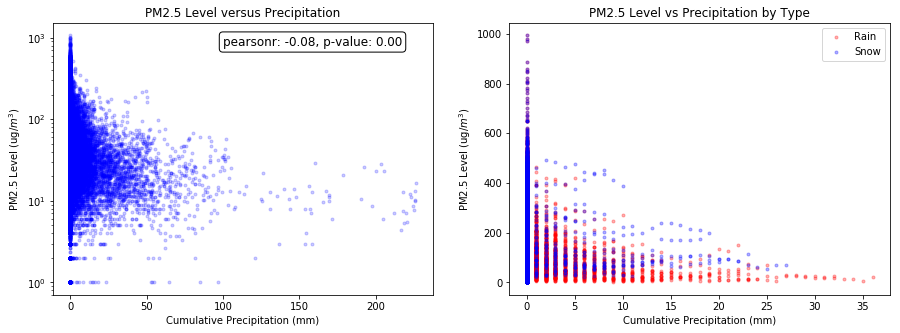

In [20]:
fig = plt.figure(figsize=(15,5))

# scatter plot of PM2.5 levels 'pm_average' vs cumulative precipitation 'iprec'
ax1 = fig.add_subplot(1,2,1)
ax1.plot(pm_clean['iprec'], pm_clean['pm_average'], marker='.',linestyle='none',color='blue',alpha=0.2); # scatter plot
ax1.set_yscale('log');
ax1.set_xlabel('Cumulative Precipitation (mm)');
ax1.set_ylabel('PM2.5 Level (ug/$m^3$)');
ax1.set_title('PM2.5 Level versus Precipitation');
prec = pm_clean[['iprec','pm_average']].dropna()
s, i, r, p, stderr = stats.linregress(prec['iprec'],prec['pm_average'])
ax1.text(100,800, "pearsonr: {:.2f}, p-value: {:.2f}".format(r,p), size=12, bbox=dict(boxstyle="round",fc="white", ec="black"));

# plot scatter plot of 'pm2.5' vs 'ir' and 'is'
ax2 = fig.add_subplot(1,2,2)
ax2.plot(pm_sr['ir'],pm_sr['pm2.5'], marker='.',linestyle='none',color='red',alpha=0.3);
ax2.plot(pm_sr['is'],pm_sr['pm2.5'], marker='.',linestyle='none',color='blue',alpha=0.3);
ax2.legend(('Rain','Snow'),loc='upper right');
ax2.set_xlabel('Cumulative Precipitation (mm)');
ax2.set_ylabel('PM2.5 Level (ug/$m^3$)');
ax2.set_title('PM2.5 Level vs Precipitation by Type');

As shown, precipitation helps to reduce high PM2.5 levels regardless of the type of precipitation. In particular, large or extended period of precipitation (high cumulative precipitations) is very effective at eliminating high PM2.5 readings (>100). However, the impact becomes very limited for lower PM2.5 readings < 50. 
Between rains and snows, rains are more effective at reducing PM2.5 levels than snows.

#### Statistical test of correlation between PM2.5 and weather parameters
Statistifcal tests are further performed to verify the correlations between PM2.5 and weather parameters. 

Given that PM2.5 distribution deviates from normal distribution significantly, the simple $t$ test of pearson coefficent r or the scipy.stats.pearsonr() function can not be used to test for non-correlation in this case. Instead, bootstrapping with permutation, where no assumption of normal distribution is required, is used here to test the pearson correlation coefficient between PM2.5 levels and numerical weather features. Chi-square test is performed  to test independence between PM2.5 and categorical features. 

Test results confirm that the correlations between PM2.5 and all weather parameters (dew point, temperature, pressure, humidity, wind direction, wind speed, precipitation, type of precipitation) are statistically significant.

## 4. Conclusion

The PM2.5 datasets containing hourly PM2.5 measurements for five major Chinese cities along with many other meteorological readings collected during the period of 2010-2015 are obtained from UCI Machine Learning Repository, cleaned up, analyzied and modeled. 
Graphical and statistifcal EDA are performed to understand the time-dependent trends of PM2.5, city-dependent variations and PM2.5 correlation to a variety of weather features. The important finds are summarized as follows:

#### PM2.5 consistency across stations:
Time series PM2.5 data are plotted by station in each city for comparing PM2.5 measurement consistency among nearby stations. The comparisons reveal that PM2.5 readings are fairly consistent among stations in all five cities, confirming the good quality of PM2.5 measurements. 

#### PM2.5 diversity among cities:
Time series PM2.5 data are plotted by city to compare the trends and differences among cities. The findings are:
* Ranking of cities by PM2.5 levels are Guangzhou < Shanghai < Chengdu, Shenyang < Beijing, indicating that Guangzhou has the best air quality among all, whereas Beijing is the worst. Among the five, Guangzhou has the most consistent low PM2.5 readings, whereas Beijing has the highest median PM2.5 level, the widest PM2.5 spread and the most days of extreme unhealthy PM2.5 levels.
* Five cities all have distinct PM2.5 spikes over time, as peak PM2.5 readings can result from many factors, for instance, local temperature, wind, etc. These factors are unique with city/location, therefore PM2.5 spikes are not overlapping.
* But, five cities also share some similar characteristic trends over time: PM2.5 readings are relative higher with larger fluctuations during winter periods and lower with smaller fluctuations in summers for most cities. 

#### PM2.5 time trends:
We have studied the time-dependent trends of PM2.5 by plotting PM2.5 levels versus hour of the day, day of the week, month of the year, season of the year, and from year to year. Below is a short summary of PM2.5 time trends: 
* Among all time-dependent trends: PM2.5 level varies systematically with hour of the day, month/season of the year and from year to year, whereas no dependence and little variation on day of the week are observed.
* PM2.5 varies by hour of the day differently among cities:<br>
for inland cities such as Beijing, Chengdu and Shenyang: larger and systematic trends are present during the 24-hour period, with PM2.5 rises slightly during morning rush hours, then drops and reaches the lowest in the afternoon, bounds up during evening hours and remains relatively high throughout the night.<br>
for coastal cities such as Shanghai and Guangzhou: only minor fluctuations are observed during the 24-hour period, with PM2.5 slightly higher during the day, highest during evening hours and slightly lower throughout the night.
* PM2.5 only shows minor fluctuations when plotted versus day of the week, with no clear trend and no distinction between weekdays and weekends.
* Monthly and seasonal trends are correlated and share similar features: <br>
Chengdu, Guangzhou, Shanghai and Shenyang: these four cities share similar trends with large variations around the year. PM2.5 levels start to drop during spring months/season and reach the lowest during summer months/season, followed by the bound up in fall months/season and rapidly reach the max during winter months/season. Overall, PM2.5 levels during winter months/season are at least twice as high as that in summer months/season.<br>
On the contrary, PM2.5 levels in Beijing only have mininal fluctuations around the year, with numbers slightly higher in summer months/season and lower during winter and spring months/season.
* Yearly trends from 2010 to 2015 show a steady improvement of air quality (a consistent decrease in PM2.5 levels) over year, except for year 2013 where a minor setback was noticed in four out of the five cities.

#### PM2.5 correlations to meteorological weather data:
We have studied all the weather features available in the datasets and found that all of them affect PM2.5 levels to some extent. Following is a quick summary of the dependence on weather conditions:
* In general, PM2.5 levels are negatively correlated to temperature, dew point, wind speed and precipitation, and positivley correlated to pressure and humidity (except for city Beijing). The correlations are supported by statistical tests.
* Temperature, dew point and pressure: PM2.5 is negatively correlated to temperature, dew point, and positively correlated to pressure. In particular, high PM2.5 levels are found to be mostly associated with low temperatures, lowe dew point and high pressure, i.e. cold weather.
* Humidity: only minor positive correlation is observed between PM2.5 and humidity. 
* Wind: PM2.5 level varies significantly with wind directions and wind speed. The dependence is unique for each city, as determined by the location and neighbour environment of the city. But some common characteristics shared among cities are: Higher wind speeds help to reduce PM2.5 levels, this has been observed with all wind directions in all cities; Static winds feature low wind speeds (<5 m/s), therefore they have limited effect on reducing PM2.5 levels; The wind direction with higher wind speeds has smaller PM2.5 median value and interquantile values; The wind direction with a stronger correlation between wind speed and PM2.5 has broader PM2.5 interquantile ranges.
* Precipitation:
Similar to wind, precipitations, both rains and snows, help to reduce PM2.5 readings. In particular, large or extended period of precipitation (high cumulative precipitations) is effective at eliminating high PM2.5 levels, rains being slightly more effective than snows. However, the impact becomes very limited for relatively low PM2.5 readings.

## 5. Future Work
**In-depth analysis will be performed and a predictive machine learning model will be created and optimized to predict future PM2.5 levels.**

In addition, the differences between the two distinct patterns observed in the hourly trend under 3.3 might be attributed to their physical locations. Shanghai and Guangzhou are coastal cities, whereas Beijing, Chengdu and Shenyang are inland cities. In-depth understanding of PM2.5 and weather data might reveal more insights on the cause of these differences.
The differences between the two distinct patterns observed in the monthly trend under 3.3 might be due to their distinct weather conditions. In-depth understanding of PM2.5 and weather data might reveal more insights on the cause of these differences.